In [5]:
import json
import glob
import pandas as pd
import sqlite3
import os
import numpy as np

def load_spotify_data():
    path = "/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify"
    files = glob.glob(os.path.join(path, "Streaming_History_Audio_*.json"))
    
    print("Files found:", files)
    all_data = []
    
    # Read first file and print structure
    if files:
        with open(files[0], 'r') as file:
            data = json.load(file)
            print("\nFirst record structure:")
            print(json.dumps(data[0], indent=2))
    
    for file_path in files:
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_data.extend(data)
    
    df = pd.DataFrame(all_data)
    print("\nColumns in DataFrame:", df.columns)
    
    df['ts'] = pd.to_datetime(df['ts'])
    df['year'] = df['ts'].dt.year
    df['month'] = df['ts'].dt.month
    df['day'] = df['ts'].dt.day
    df['hour'] = df['ts'].dt.hour
    df['minutes_played'] = df['ms_played'] / 60000
    
    return df

df = load_spotify_data()
conn = sqlite3.connect('spotify_history.db')
df.to_sql('listening_history', conn, if_exists='replace', index=False)
conn.close()

print("Database created successfully!")

Files found: ['/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2012-2014_0.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2020-2021_8.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2023-2024_14.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2024-2025_15.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2014-2016_1.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2022_11.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2018-2019_4.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_Audio_2019_5.json', '/Users/andrewedwards/Desktop/spotify-history/venv/christians spotify/Streaming_History_A

In [6]:
conn = sqlite3.connect('spotify_history.db')
query = """
SELECT 
    master_metadata_album_artist_name as artist,
    COUNT(*) as play_count,
    SUM(minutes_played) as total_minutes
FROM listening_history
GROUP BY artist
ORDER BY play_count DESC
LIMIT 10
"""
pd.read_sql_query(query, conn)

,artist,play_count,total_minutes
0,Title Fight,4481,8473.741800
1,Alex G,3310,4107.397300
2,The Beatles,3280,4862.299600
3,Ty Segall,2923,3547.636200
4,Elliott Smith,2572,4615.381700
5,The Brian Jonestown Massacre,2287,4273.131817
6,P.H.F.,2235,2943.739833
7,Black Lips,2128,2926.785917
8,JEFF The Brotherhood,2032,2485.676183
9,Beach Fossils,1785,3338.811000


In [47]:
conn = sqlite3.connect('spotify_history.db')

query = """
WITH artist_stats AS (
    SELECT 
        master_metadata_album_artist_name as artist,
        master_metadata_track_name as track,
        COUNT(*) as play_count,
        SUM(minutes_played) as total_minutes,
        AVG(minutes_played) as avg_minutes
    FROM listening_history
    WHERE master_metadata_album_artist_name IS NOT NULL
    GROUP BY artist, track
)
SELECT 
    artist,
    track,
    play_count,
    ROUND(total_minutes, 2) as total_minutes,
    ROUND(avg_minutes, 2) as avg_minutes
FROM artist_stats
ORDER BY play_count DESC
LIMIT 20;
"""

print('\nTop Songs by Play Count')
pd.read_sql_query(query, conn)


Top Songs by Play Count


,artist,track,play_count,total_minutes,avg_minutes
0,Title Fight,Shed,319,576.84,1.81
1,SPIRIT OF THE BEEHIVE,Natural Devotion,299,560.37,1.87
2,Title Fight,Head in the Ceiling Fan,259,603.35,2.33
3,Ovlov,Where's My Dini?,246,367.77,1.49
4,Brand New,The Quiet Things That No One Ever Knows,231,609.27,2.64
5,JEFF The Brotherhood,Mellow Out,231,244.58,1.06
6,Title Fight,Where Am I?,217,441.57,2.03
7,Surf Curse,Freaks,213,270.12,1.27
8,Jaded Juice Riders,Ready To Go,208,313.77,1.51
9,Title Fight,"Numb, But I Still Feel It",196,448.15,2.29


In [48]:
conn = sqlite3.connect('spotify_history.db')

query = """
WITH artist_stats AS (
    SELECT 
        master_metadata_album_artist_name as artist,
        master_metadata_track_name as track,
        COUNT(*) as play_count,
        SUM(minutes_played) as total_minutes,
        AVG(minutes_played) as avg_minutes
    FROM listening_history
    WHERE master_metadata_album_artist_name IS NOT NULL
    GROUP BY artist, track
)
SELECT 
    artist,
    track,
    play_count,
    ROUND(total_minutes, 2) as total_minutes,
    ROUND(avg_minutes, 2) as avg_minutes
FROM artist_stats
ORDER BY total_minutes DESC
LIMIT 20;
"""

print('\nTop Songs by Minutes Listened')
pd.read_sql_query(query, conn)


Top Songs by Minutes Listened


,artist,track,play_count,total_minutes,avg_minutes
0,Brand New,The Quiet Things That No One Ever Knows,231,609.27,2.64
1,Title Fight,Head in the Ceiling Fan,259,603.35,2.33
2,Title Fight,Shed,319,576.84,1.81
3,SPIRIT OF THE BEEHIVE,Natural Devotion,299,560.37,1.87
4,Built To Spill,Carry the Zero,155,499.14,3.22
5,Title Fight,Like a Ritual,194,470.34,2.42
6,Title Fight,"Numb, But I Still Feel It",196,448.15,2.29
7,Title Fight,Where Am I?,217,441.57,2.03
8,The Brian Jonestown Massacre,Anemone,158,419.07,2.65
9,Brand New,Seventy Times 7,193,410.36,2.13


In [50]:
query = """
SELECT 
   year,
   COUNT(*) as total_streams,
   ROUND(SUM(minutes_played), 2) as total_minutes,
   COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks
FROM listening_history
GROUP BY year 
ORDER BY total_streams DESC limit 10;
"""

print('\nYears by Total Streams')
pd.read_sql_query(query, conn)


Years by Total Streams


,year,total_streams,total_minutes,unique_artists,unique_tracks
0,2019,34566,44182.25,2148,7216
1,2020,31332,47628.09,3056,9414
2,2023,30824,52609.68,2795,8414
3,2021,29504,45851.00,2951,8074
4,2024,26274,45527.77,3091,8621
5,2022,26176,44399.14,2909,7761
6,2018,18741,18237.36,1427,4556
7,2017,15449,18329.81,1084,3727
8,2014,14846,22285.55,1075,3608
9,2015,11746,16202.49,1083,3607


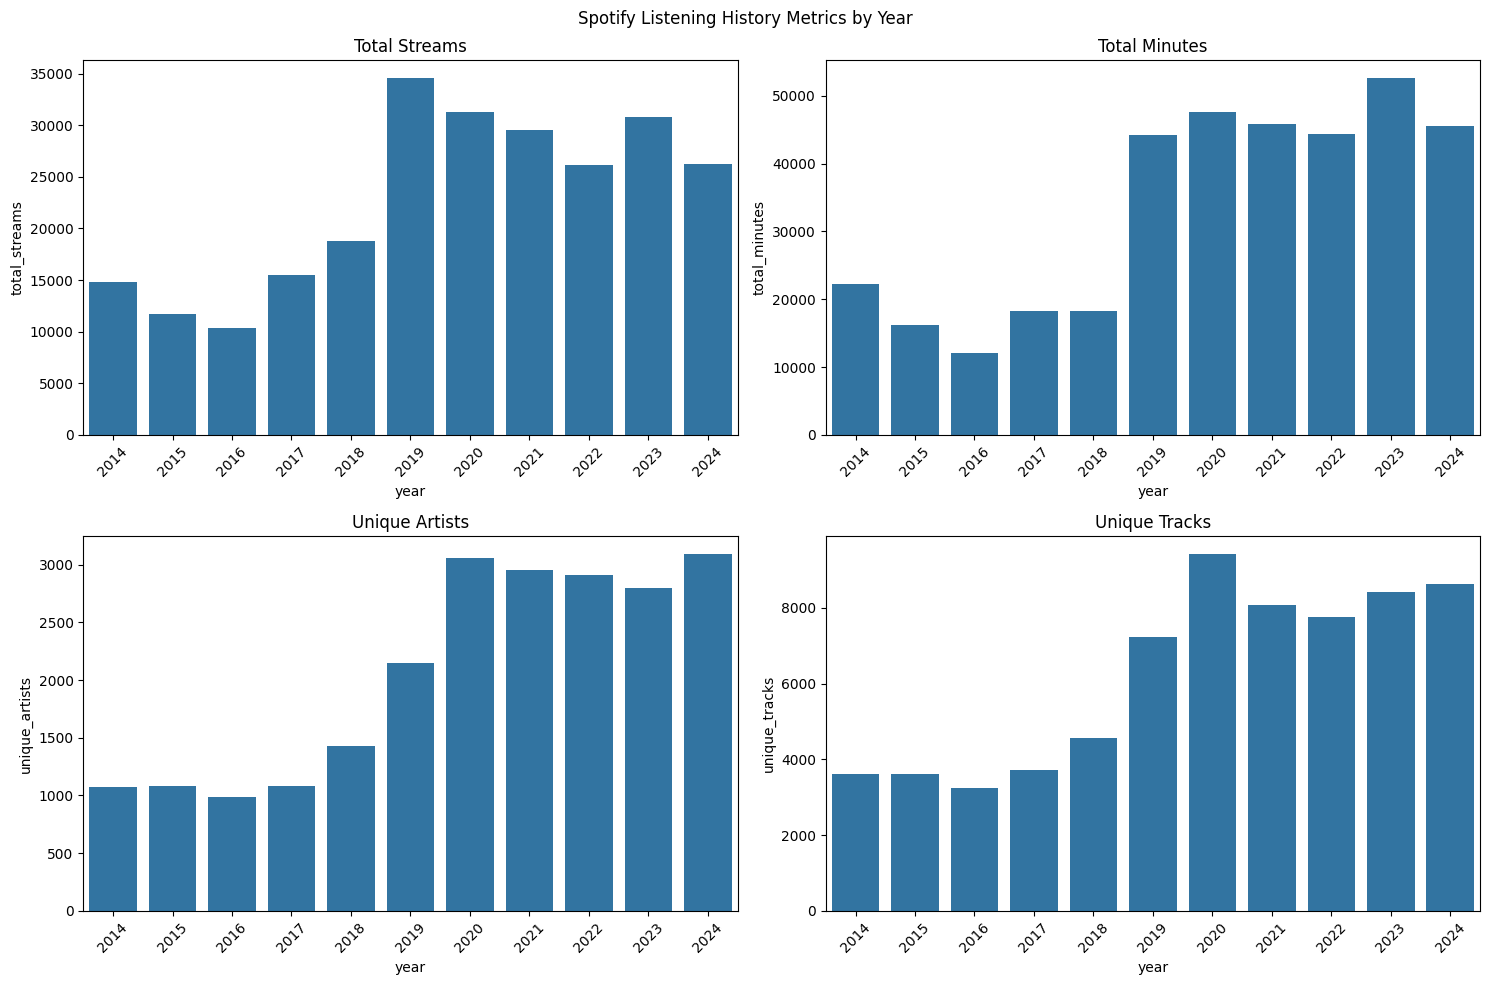

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT year, total_streams, total_minutes, unique_artists, unique_tracks
FROM (
   SELECT 
       year,
       COUNT(*) as total_streams,
       ROUND(SUM(minutes_played), 2) as total_minutes,
       COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE year > 2013 AND year < 2025
   GROUP BY year
) data
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Spotify Listening History Metrics by Year')

metrics = ['total_streams', 'total_minutes', 'unique_artists', 'unique_tracks']
for i, metric in enumerate(metrics):
   ax = axes[i//2, i%2]
   sns.barplot(data=df, x='year', y=metric, ax=ax)
   ax.set_title(metric.replace('_', ' ').title())
   ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

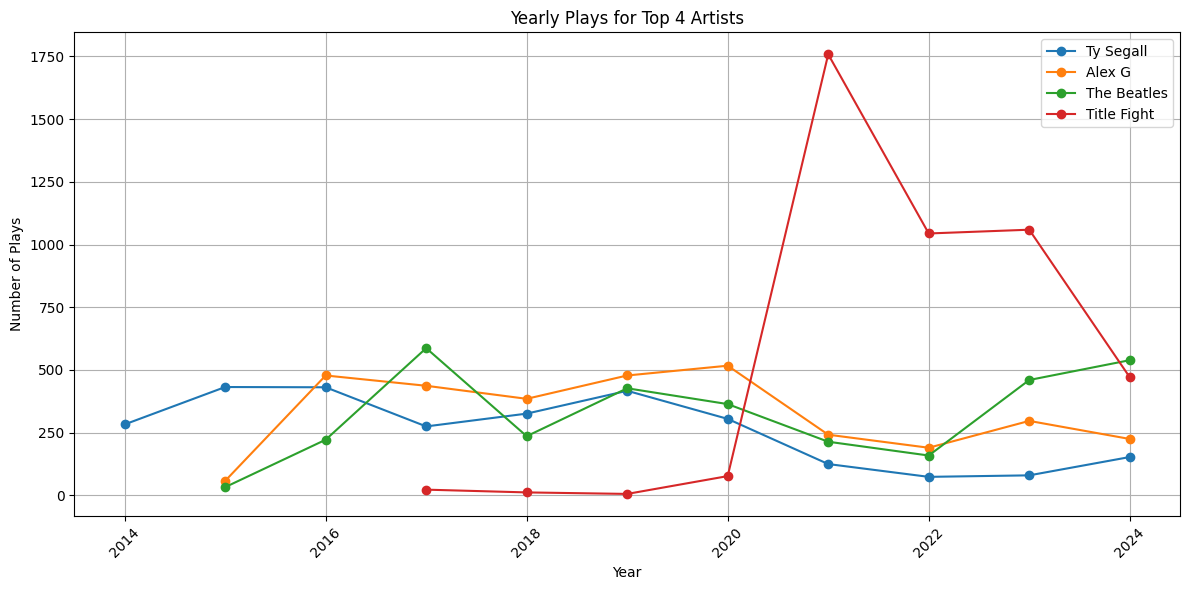

In [11]:
query = """
WITH artist_counts AS (
   SELECT 
       year,
       master_metadata_album_artist_name,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY year, master_metadata_album_artist_name
)
SELECT year, master_metadata_album_artist_name, plays
FROM artist_counts
WHERE master_metadata_album_artist_name IN (
   SELECT master_metadata_album_artist_name 
   FROM listening_history
   GROUP BY master_metadata_album_artist_name
   ORDER BY COUNT(*) DESC
   LIMIT 4
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for artist in df['master_metadata_album_artist_name'].unique():
   artist_data = df[df['master_metadata_album_artist_name'] == artist]
   plt.plot(artist_data['year'], artist_data['plays'], marker='o', label=artist)

plt.title('Yearly Plays for Top 4 Artists')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

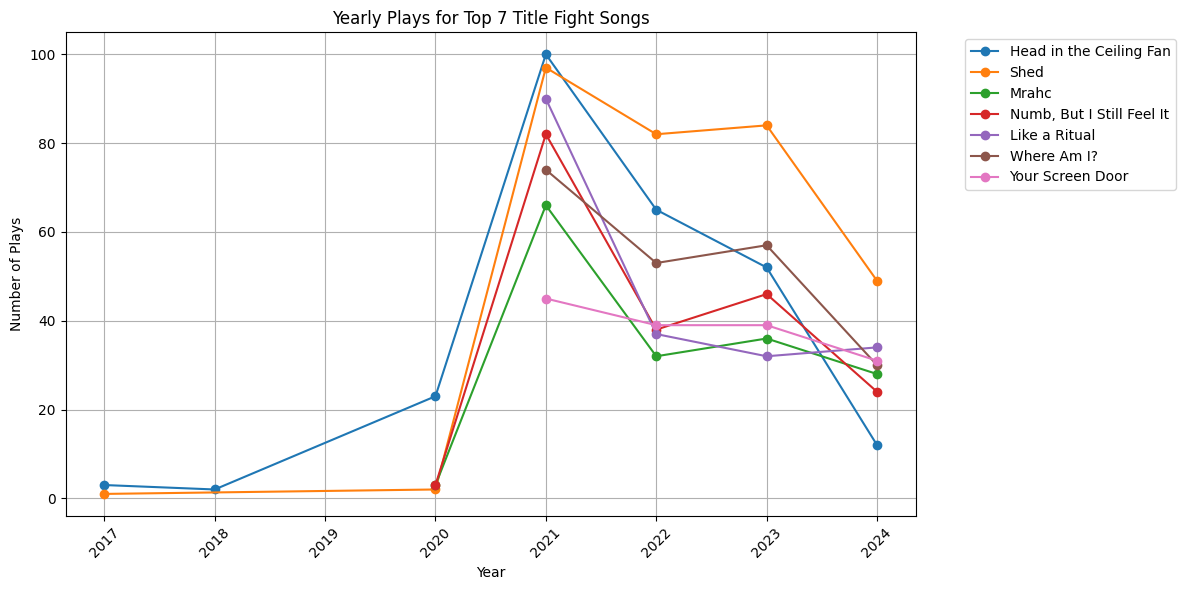

In [51]:
query = """
SELECT 
   master_metadata_track_name,
   year,
   COUNT(*) as plays
FROM listening_history 
WHERE master_metadata_album_artist_name = 'Title Fight'
   AND year > 2013 AND year < 2025
GROUP BY master_metadata_track_name, year
HAVING master_metadata_track_name IN (
   SELECT master_metadata_track_name
   FROM listening_history
   WHERE master_metadata_album_artist_name = 'Title Fight'
   GROUP BY master_metadata_track_name
   ORDER BY COUNT(*) DESC
   LIMIT 7
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for song in df['master_metadata_track_name'].unique():
   song_data = df[df['master_metadata_track_name'] == song]
   plt.plot(song_data['year'], song_data['plays'], marker='o', label=song)

plt.title('Yearly Plays for Top 7 Title Fight Songs')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

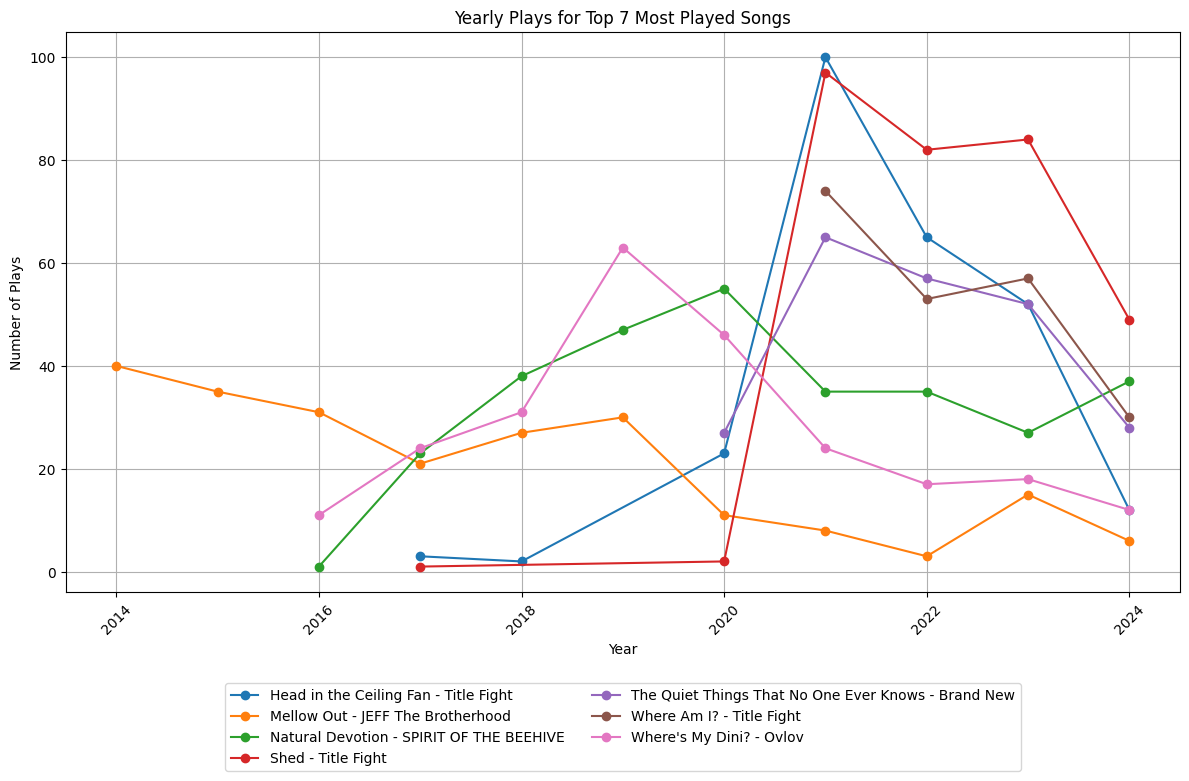

In [13]:
query = """
WITH top_songs AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       year,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY track, artist, year
   HAVING (track, artist) IN (
       SELECT 
           master_metadata_track_name,
           master_metadata_album_artist_name
       FROM listening_history
       GROUP BY master_metadata_track_name, master_metadata_album_artist_name
       ORDER BY COUNT(*) DESC
       LIMIT 7
   )
)
SELECT * FROM top_songs
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 8))  # Increased height to accommodate legend
for song in df.groupby(['track', 'artist']):
   song_data = song[1]
   label = f"{song[0][0]} - {song[0][1]}"
   plt.plot(song_data['year'], song_data['plays'], marker='o', label=label)

plt.title('Yearly Plays for Top 7 Most Played Songs')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

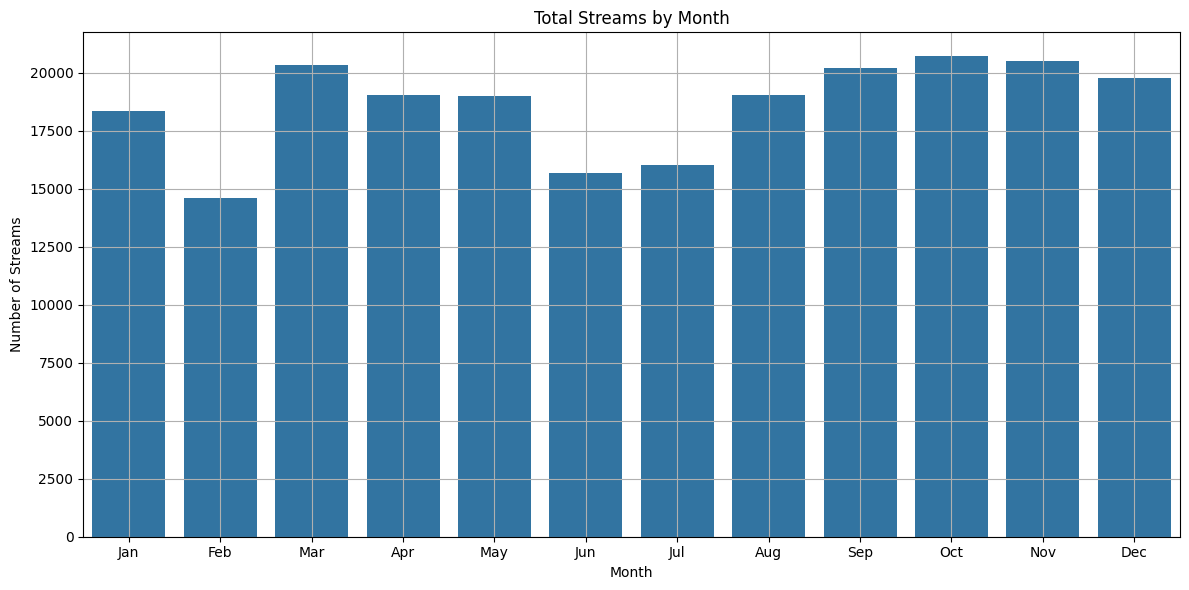

In [14]:
query = """
SELECT 
   month,
   COUNT(*) as total_streams
FROM listening_history
WHERE year > 2015 AND year < 2025
GROUP BY month
ORDER BY month;
"""

df = pd.read_sql_query(query, conn)

# Add month names
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month_name'] = df['month'].map(month_names)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month_name', y='total_streams')
plt.title('Total Streams by Month')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.grid(True)
plt.tight_layout()
plt.show()

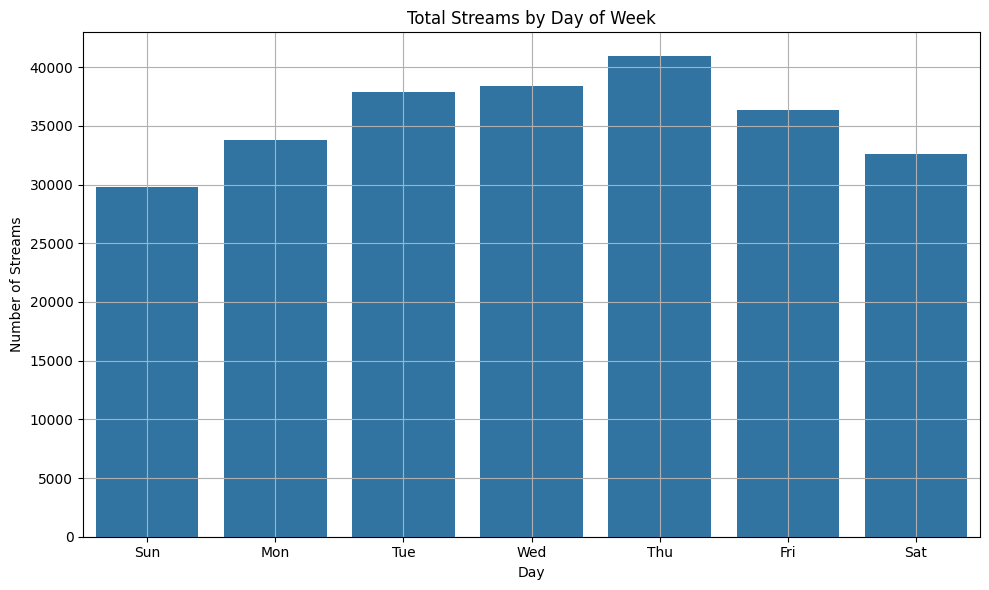

In [15]:
query = """
SELECT 
   CAST(strftime('%w', ts) AS INTEGER) as day_num,
   COUNT(*) as total_streams
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY day_num
ORDER BY day_num;
"""

df = pd.read_sql_query(query, conn)

day_names = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df['day_name'] = df['day_num'].map(day_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_name', y='total_streams')
plt.title('Total Streams by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Streams')
plt.grid(True)
plt.tight_layout()
plt.show()

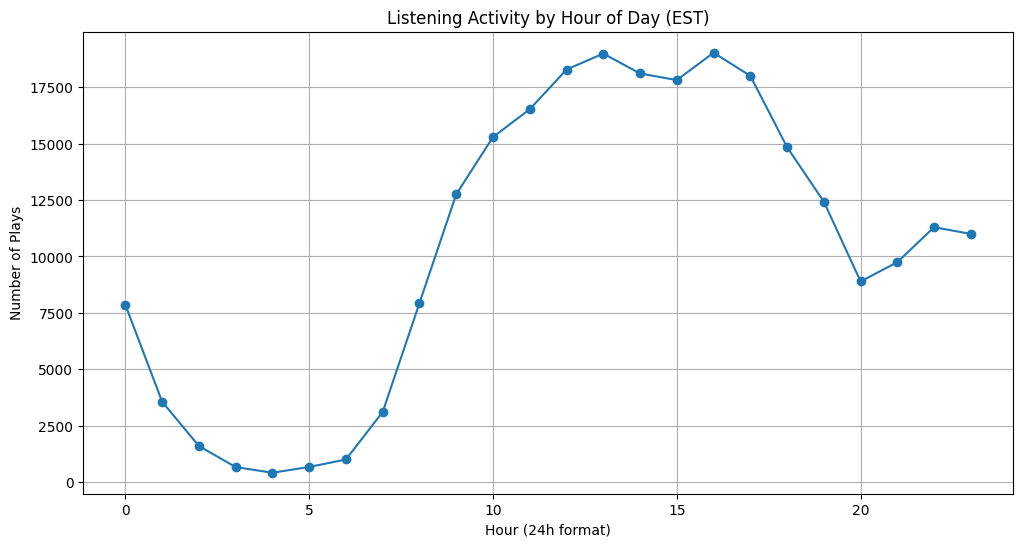

In [16]:
query = """
SELECT 
   CAST(strftime('%H', datetime(ts, '-5 hours')) AS INTEGER) as hour,
   COUNT(*) as plays,
   ROUND(SUM(minutes_played),2) as total_minutes
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY hour
ORDER BY hour;
"""

df = pd.read_sql_query(query, conn)
plt.figure(figsize=(12, 6))
plt.plot(df['hour'], df['plays'], marker='o')
plt.title('Listening Activity by Hour of Day (EST)')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Plays')
plt.grid(True)
plt.show()

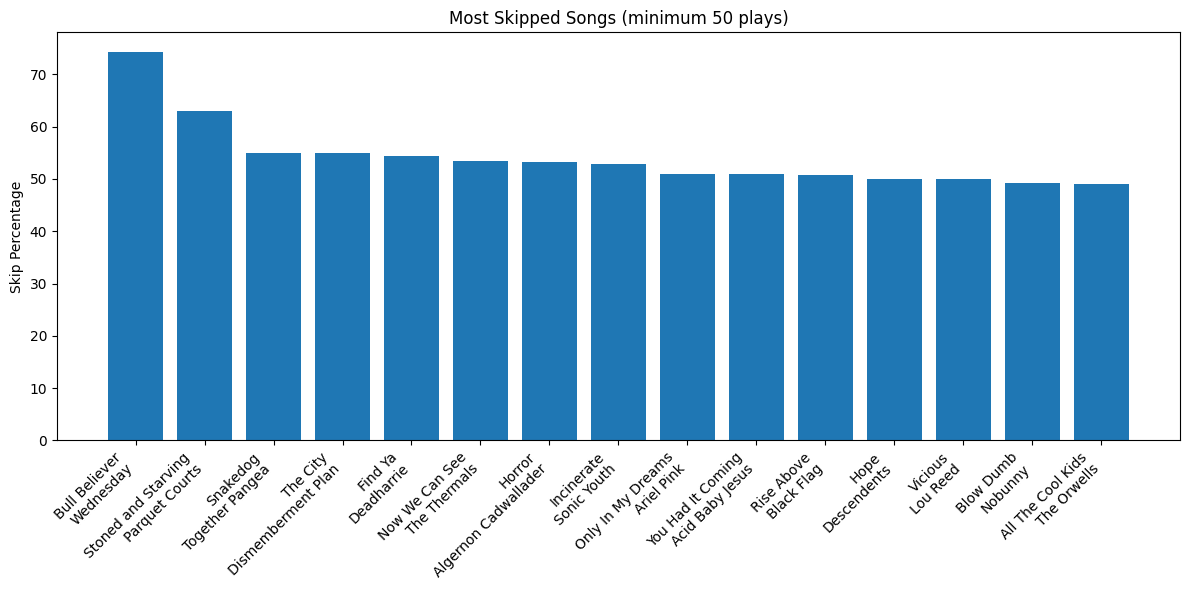

In [17]:
query = """
SELECT 
   master_metadata_track_name as track,
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   SUM(CASE WHEN skipped = 1 THEN 1 ELSE 0 END) as skips,
   ROUND(CAST(SUM(CASE WHEN skipped = 1 THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100, 2) as skip_percentage
FROM listening_history
GROUP BY track, artist
HAVING total_plays > 50
ORDER BY skip_percentage DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['skip_percentage'])
plt.xticks(range(len(df)), [f"{df['track'].iloc[i]}\n{df['artist'].iloc[i]}" for i in range(len(df))], rotation=45, ha='right')
plt.title('Most Skipped Songs (minimum 50 plays)')
plt.ylabel('Skip Percentage')
plt.tight_layout()
plt.show()

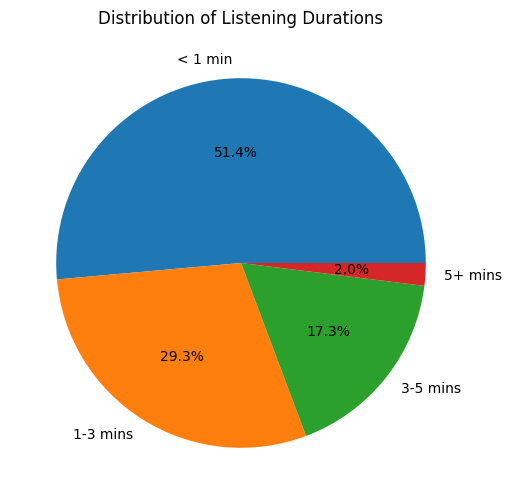

In [18]:
query = """
SELECT 
   CASE 
       WHEN minutes_played < 1 THEN '< 1 min'
       WHEN minutes_played < 3 THEN '1-3 mins'
       WHEN minutes_played < 5 THEN '3-5 mins'
       ELSE '5+ mins'
   END as duration_bucket,
   COUNT(*) as count
FROM listening_history
GROUP BY duration_bucket
ORDER BY 
   CASE duration_bucket
       WHEN '< 1 min' THEN 1
       WHEN '1-3 mins' THEN 2
       WHEN '3-5 mins' THEN 3
       ELSE 4
   END;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['duration_bucket'], autopct='%1.1f%%')
plt.title('Distribution of Listening Durations')
plt.show()

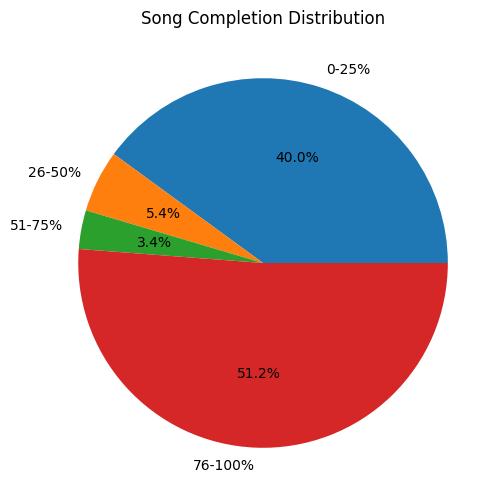

In [19]:
query = """
SELECT 
   CASE 
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.25 THEN '0-25%'
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.50 THEN '26-50%'
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.75 THEN '51-75%'
       ELSE '76-100%'
   END as completion_bucket,
   COUNT(*) as count
FROM listening_history
WHERE master_metadata_track_name IS NOT NULL
   AND year > 2013 AND year < 2025
GROUP BY completion_bucket
ORDER BY completion_bucket;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['completion_bucket'], autopct='%1.1f%%')
plt.title('Song Completion Distribution')
plt.show()

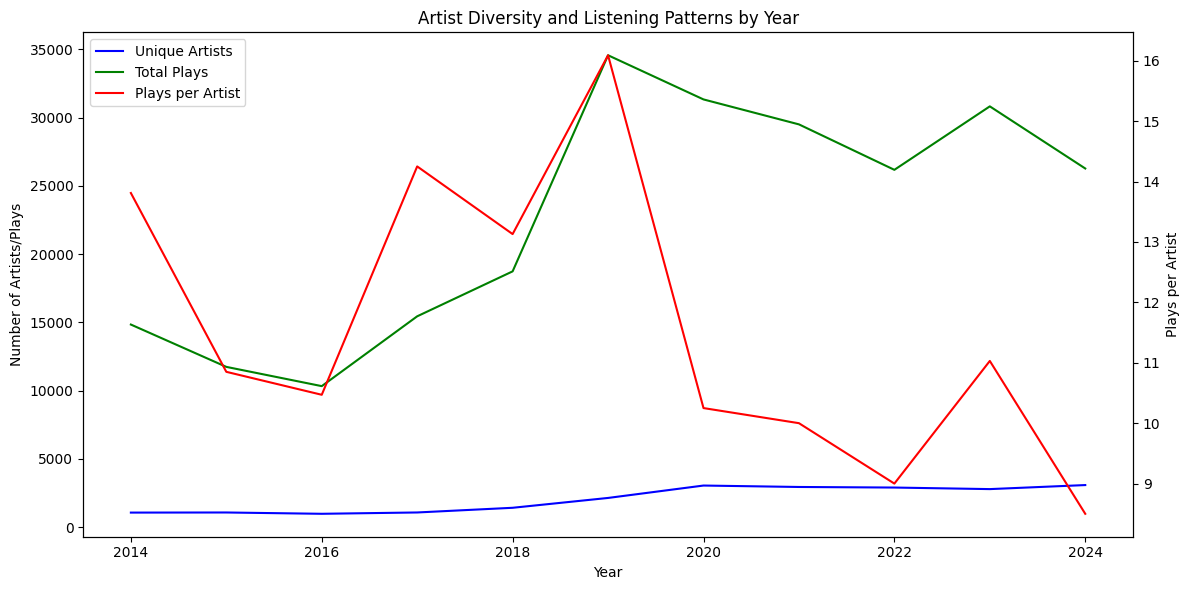

In [20]:
query = """
SELECT 
   year,
   COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
   COUNT(*) as total_plays,
   ROUND(CAST(COUNT(*) AS FLOAT) / COUNT(DISTINCT master_metadata_album_artist_name), 2) as plays_per_artist
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Artists/Plays')
ln1 = ax1.plot(df['year'], df['unique_artists'], 'b-', label='Unique Artists')
ln2 = ax1.plot(df['year'], df['total_plays'], 'g-', label='Total Plays')

ax2 = ax1.twinx()
ax2.set_ylabel('Plays per Artist')
ln3 = ax2.plot(df['year'], df['plays_per_artist'], 'r-', label='Plays per Artist')

lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Artist Diversity and Listening Patterns by Year')
plt.tight_layout()
plt.show()

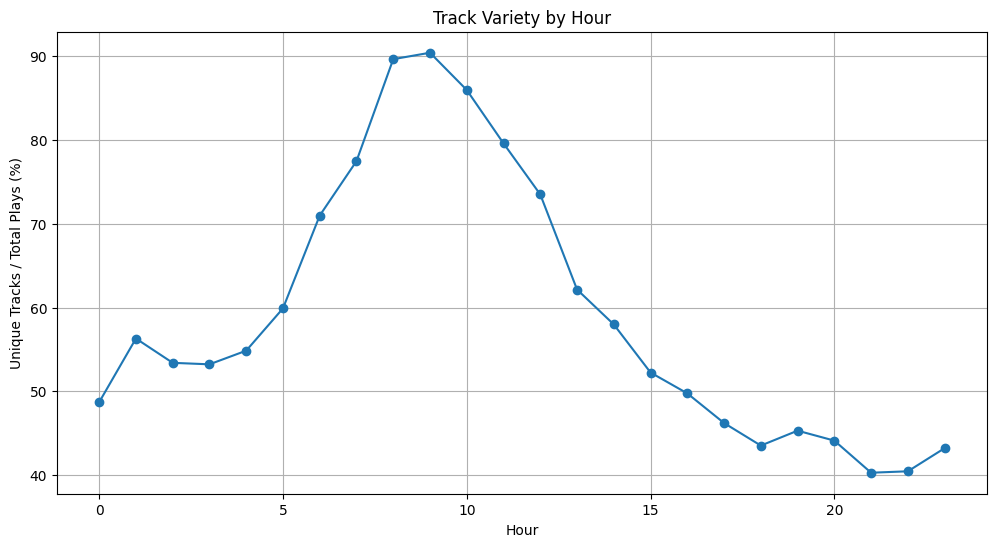

In [21]:
query = """
WITH hourly_unique AS (
    SELECT 
        hour,
        COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
        COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
        COUNT(*) as total_plays
    FROM listening_history
    WHERE year > 2013 AND year < 2025
    GROUP BY hour
)
SELECT 
    hour,
    unique_tracks,
    unique_artists,
    ROUND(CAST(unique_tracks AS FLOAT) / total_plays * 100, 2) as track_variety_score
FROM hourly_unique
ORDER BY hour;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['hour'], df['track_variety_score'], marker='o')
plt.title('Track Variety by Hour')
plt.xlabel('Hour')
plt.ylabel('Unique Tracks / Total Plays (%)')
plt.grid(True)
plt.show()

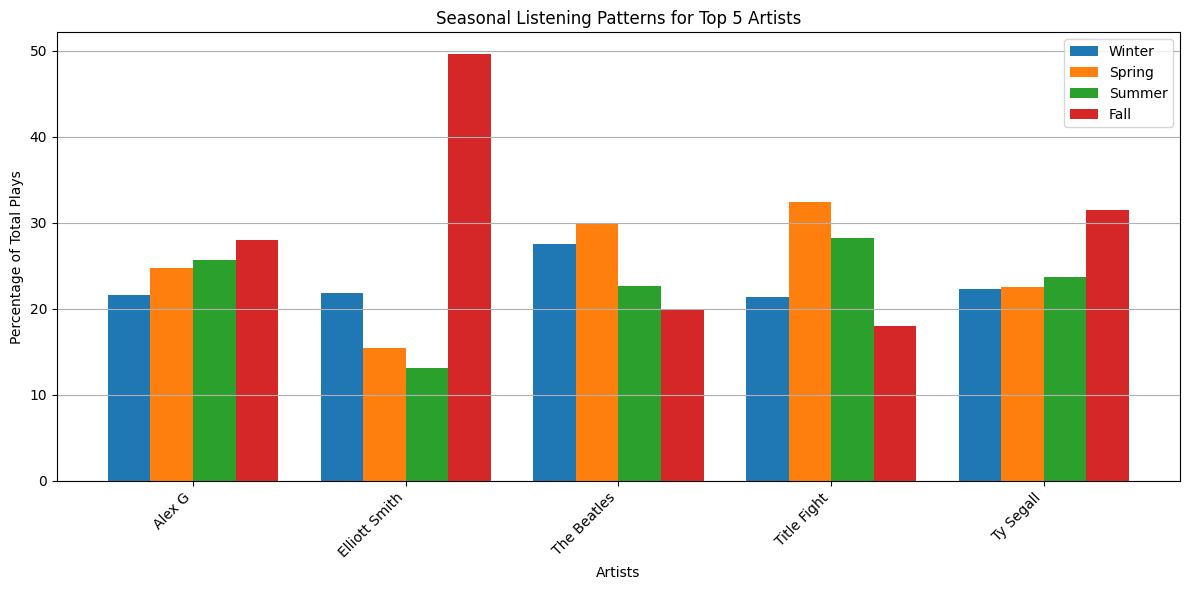

In [22]:
query = """
WITH seasonal_plays AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       CASE 
           WHEN month IN (12,1,2) THEN 'Winter'
           WHEN month IN (3,4,5) THEN 'Spring'
           WHEN month IN (6,7,8) THEN 'Summer'
           ELSE 'Fall'
       END as season,
       COUNT(*) as plays
   FROM listening_history
   WHERE year > 2013 AND year < 2025
   GROUP BY artist, season
   HAVING artist IN (
       SELECT master_metadata_album_artist_name
       FROM listening_history
       GROUP BY master_metadata_album_artist_name
       HAVING COUNT(*) > 200
       ORDER BY COUNT(*) DESC
       LIMIT 5
   )
)
SELECT 
   artist,
   season,
   plays,
   ROUND(plays * 100.0 / SUM(plays) OVER (PARTITION BY artist), 2) as season_percentage
FROM seasonal_plays
ORDER BY artist, season;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
artists = df['artist'].unique()
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
x = np.arange(len(artists))
width = 0.2

for i, season in enumerate(seasons):
   season_data = df[df['season'] == season]
   plt.bar(x + i*width, season_data['season_percentage'], width, label=season)

plt.xlabel('Artists')
plt.ylabel('Percentage of Total Plays')
plt.title('Seasonal Listening Patterns for Top 5 Artists')
plt.xticks(x + width*1.5, artists, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show() 

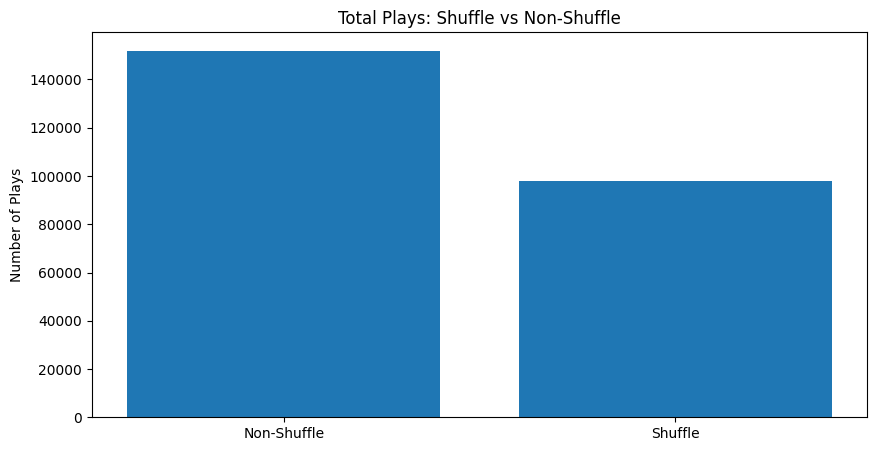

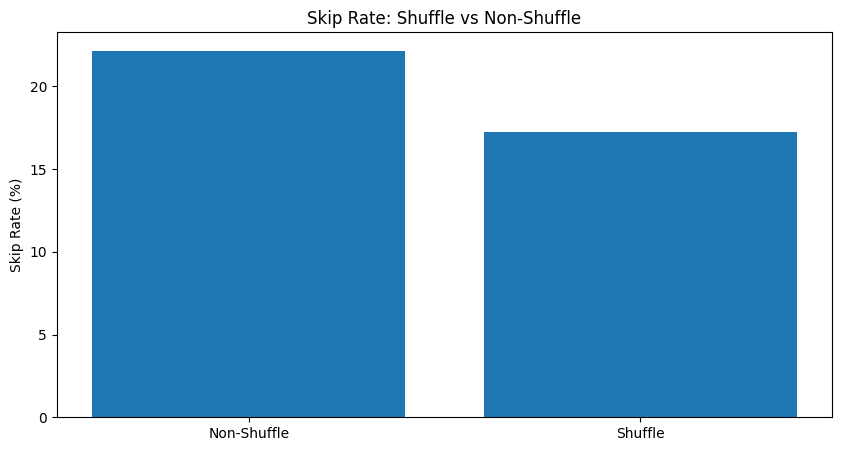

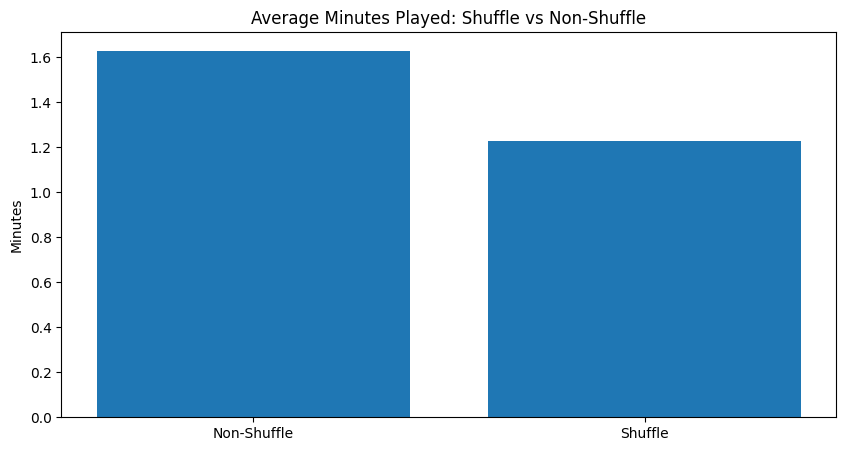

In [23]:
query = """
SELECT 
    CASE WHEN shuffle THEN 'Shuffle' ELSE 'Non-Shuffle' END as play_mode,
    COUNT(*) as plays,
    ROUND(AVG(CASE WHEN skipped THEN 1 ELSE 0 END) * 100, 2) as skip_rate,
    ROUND(AVG(minutes_played), 2) as avg_minutes_played
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY shuffle;
"""

df = pd.read_sql_query(query, conn)

# Simple bar plot comparing total plays
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['plays'])
plt.title('Total Plays: Shuffle vs Non-Shuffle')
plt.ylabel('Number of Plays')
plt.show()

# Skip rate comparison
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['skip_rate'])
plt.title('Skip Rate: Shuffle vs Non-Shuffle')
plt.ylabel('Skip Rate (%)')
plt.show()

# Average listening time
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['avg_minutes_played'])
plt.title('Average Minutes Played: Shuffle vs Non-Shuffle')
plt.ylabel('Minutes')
plt.show()

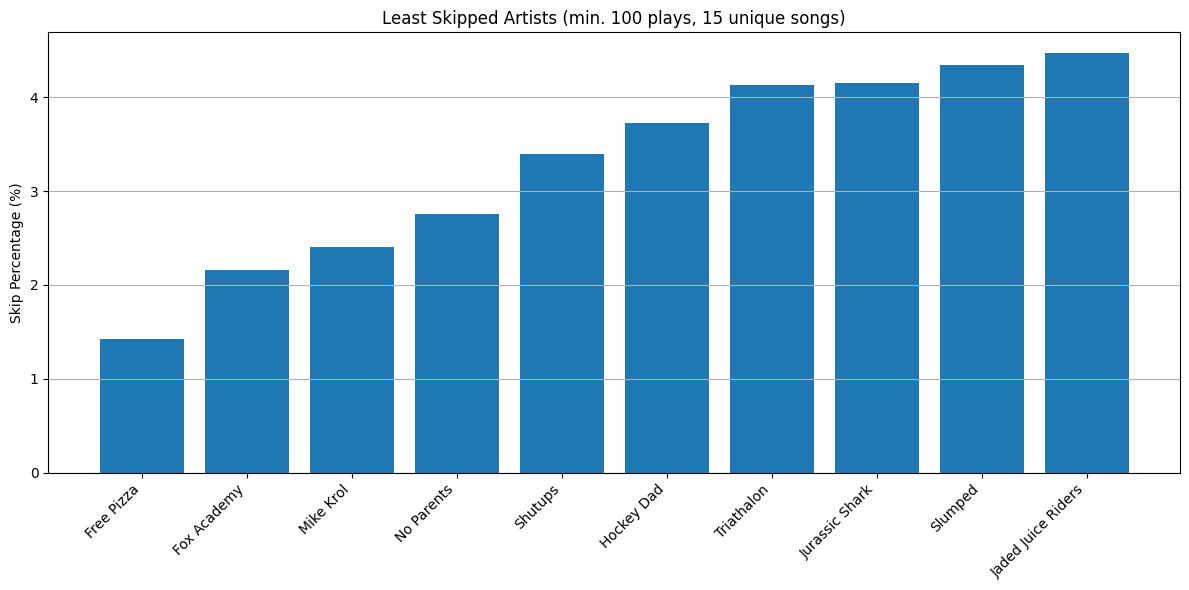

In [24]:
query = """
WITH artist_song_counts AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       COUNT(DISTINCT master_metadata_track_name) as unique_songs
   FROM listening_history
   GROUP BY artist
)
SELECT 
   h.master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   SUM(CASE WHEN skipped THEN 1 ELSE 0 END) as total_skips,
   ROUND(CAST(SUM(CASE WHEN skipped THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100, 2) as skip_percentage,
   asc.unique_songs
FROM listening_history h
JOIN artist_song_counts asc ON h.master_metadata_album_artist_name = asc.artist
WHERE year > 2013 AND year < 2025
   AND h.master_metadata_album_artist_name IS NOT NULL
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays > 100 AND asc.unique_songs >= 15
ORDER BY skip_percentage ASC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['skip_percentage'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Least Skipped Artists (min. 100 plays, 15 unique songs)')
plt.ylabel('Skip Percentage (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

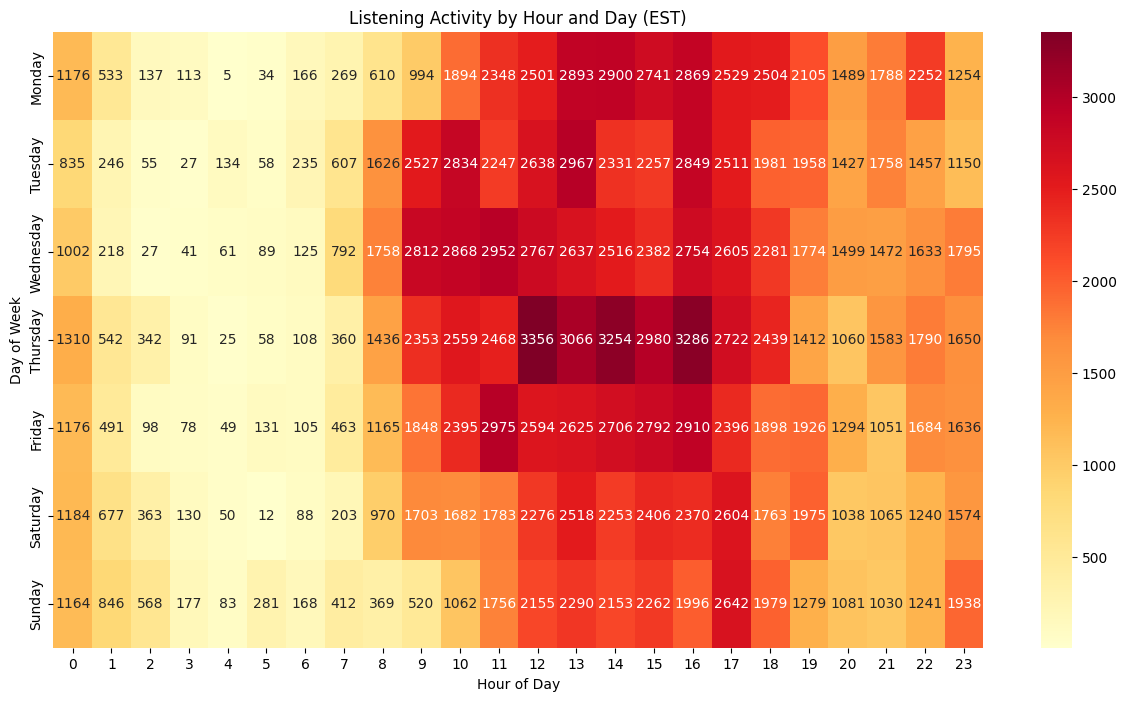

In [25]:
query = """
SELECT 
    CAST(strftime('%w', datetime(ts, '-5 hours')) AS INTEGER) as day_num,
    CAST(strftime('%H', datetime(ts, '-5 hours')) AS INTEGER) as hour,
    COUNT(*) as play_count
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY day_num, hour
ORDER BY day_num, hour;
"""

df = pd.read_sql_query(query, conn)
days = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df['day'] = df['day_num'].map(days)
pivot_table = df.pivot(index='day', columns='hour', values='play_count')
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Listening Activity by Hour and Day (EST)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

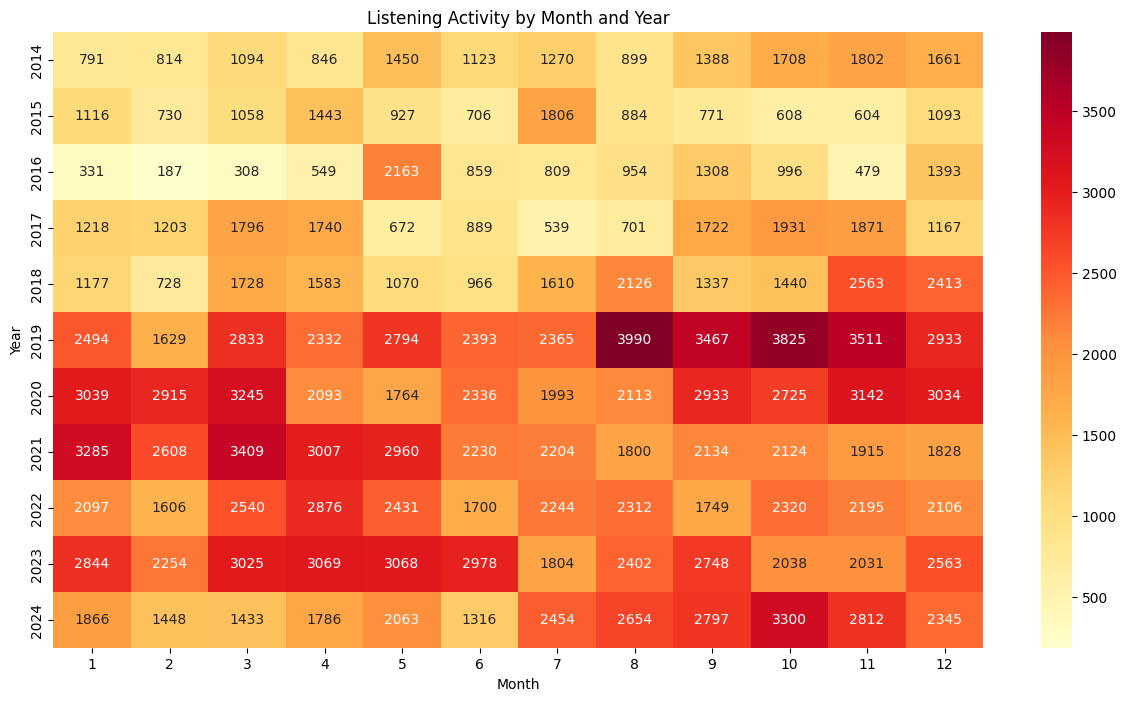

In [26]:
query = """
SELECT 
    year,
    month,
    COUNT(*) as play_count
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY year, month
ORDER BY year, month;
"""

df = pd.read_sql_query(query, conn)
pivot_table = df.pivot(index='year', columns='month', values='play_count')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Listening Activity by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

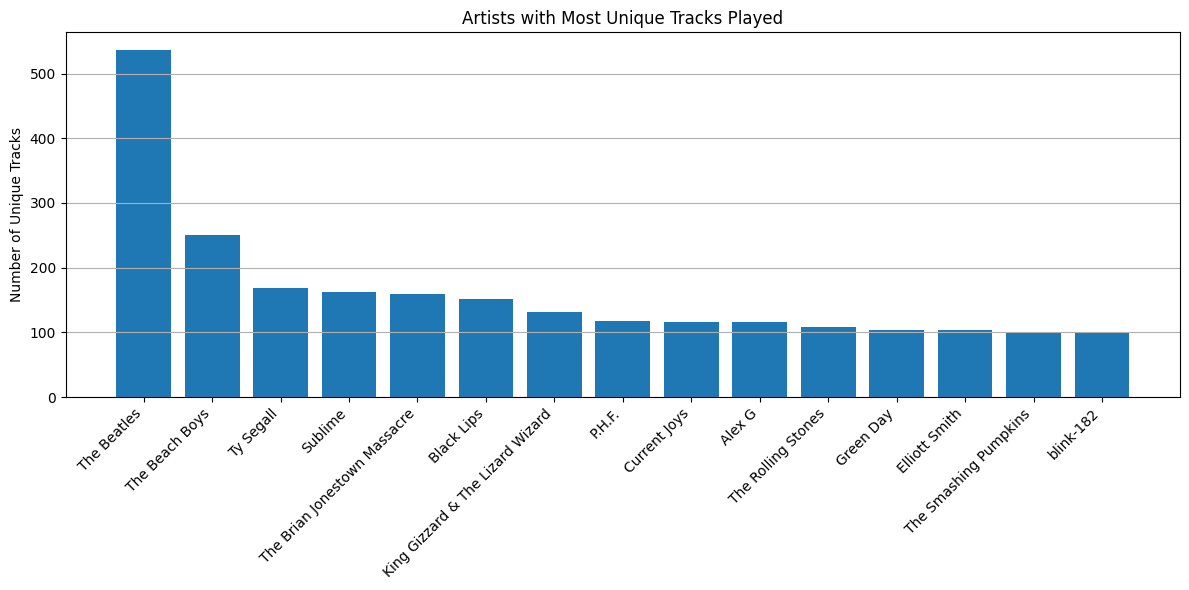

In [27]:
query = """
SELECT 
   master_metadata_album_artist_name as artist,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   COUNT(*) as total_plays
FROM listening_history
WHERE master_metadata_album_artist_name IS NOT NULL
   AND master_metadata_album_artist_name != '8 Bit Universe'
GROUP BY artist
ORDER BY unique_tracks DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['unique_tracks'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Artists with Most Unique Tracks Played')
plt.ylabel('Number of Unique Tracks')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

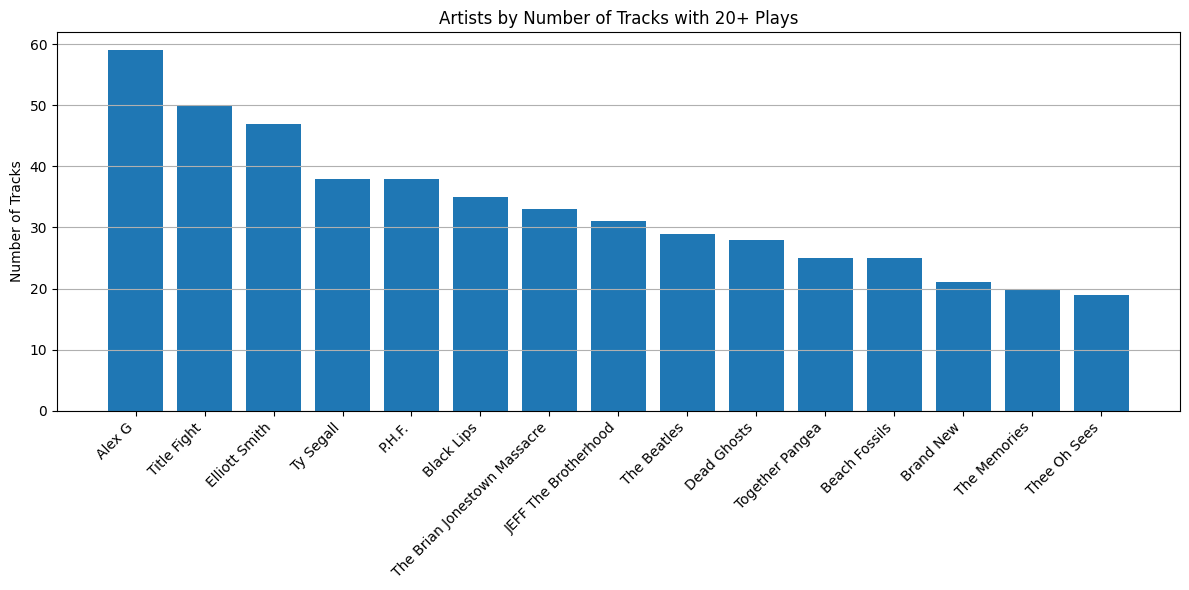

In [28]:
query = """
WITH track_counts AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       master_metadata_track_name as track,
       COUNT(*) as play_count
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
   GROUP BY artist, track
   HAVING play_count >= 20
)
SELECT 
   artist,
   COUNT(*) as tracks_over_20_plays,
   SUM(play_count) as total_plays
FROM track_counts
GROUP BY artist
ORDER BY tracks_over_20_plays DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['tracks_over_20_plays'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Artists by Number of Tracks with 20+ Plays')
plt.ylabel('Number of Tracks')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

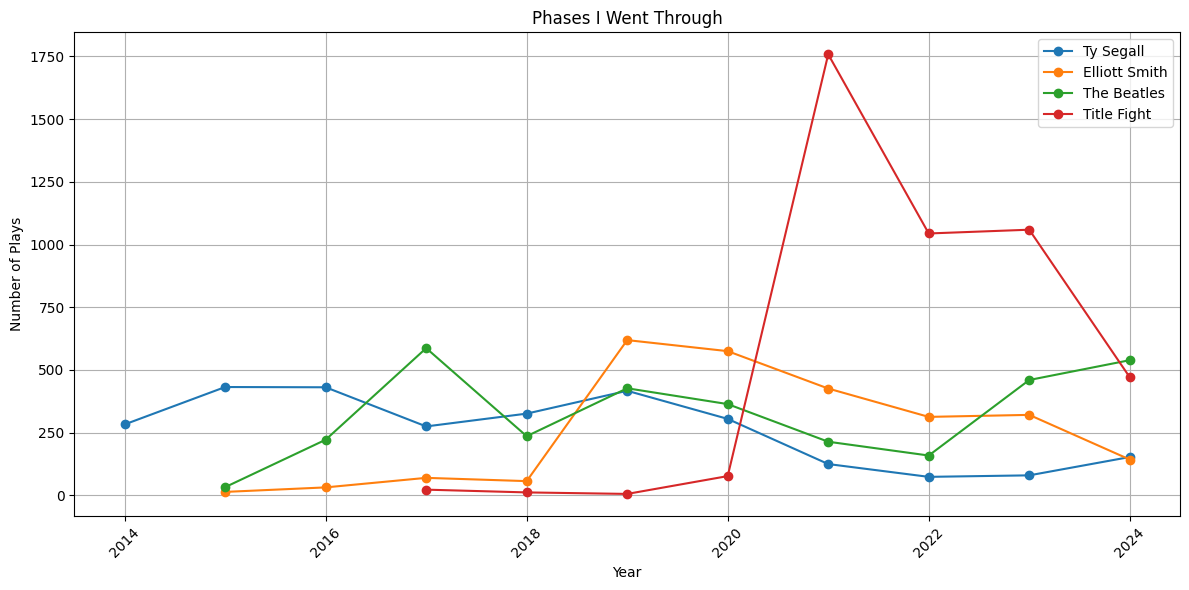

In [54]:
query = """
WITH artist_counts AS (
   SELECT 
       year,
       master_metadata_album_artist_name,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY year, master_metadata_album_artist_name
)
SELECT year, master_metadata_album_artist_name, plays
FROM artist_counts
WHERE master_metadata_album_artist_name IN (
   SELECT master_metadata_album_artist_name 
   FROM listening_history
   WHERE master_metadata_album_artist_name = 'The Beatles' OR
       master_metadata_album_artist_name = 'Elliott Smith' OR
       master_metadata_album_artist_name = 'Ty Segall' OR
       master_metadata_album_artist_name = 'Title Fight'
   GROUP BY master_metadata_album_artist_name
   ORDER BY COUNT(*) DESC
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for artist in df['master_metadata_album_artist_name'].unique():
   artist_data = df[df['master_metadata_album_artist_name'] == artist]
   plt.plot(artist_data['year'], artist_data['plays'], marker='o', label=artist)

plt.title('Phases I Went Through')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

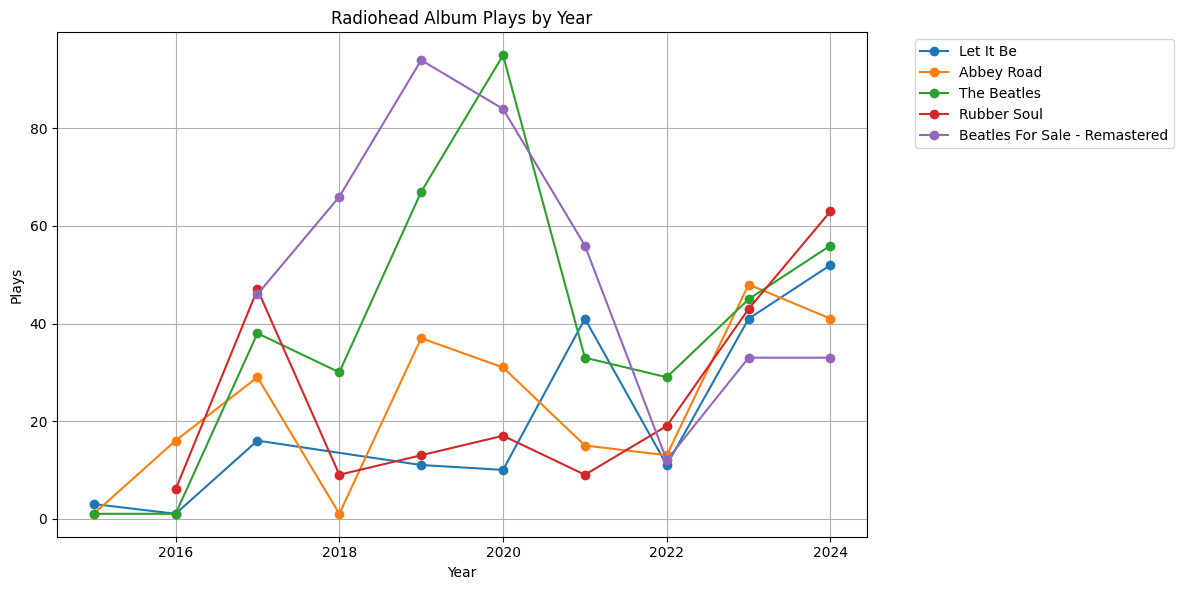

In [55]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   year,
   COUNT(*) as plays
FROM listening_history
WHERE master_metadata_album_artist_name = 'The Beatles'
   AND master_metadata_album_album_name IN (
       SELECT master_metadata_album_album_name
       FROM listening_history
       WHERE master_metadata_album_artist_name = 'The Beatles'
       GROUP BY master_metadata_album_album_name
       ORDER BY COUNT(*) DESC
       LIMIT 5
   )
   AND year > 2013 AND year < 2025
GROUP BY album, year
ORDER BY year, plays DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for album in df['album'].unique():
   album_data = df[df['album'] == album]
   plt.plot(album_data['year'], album_data['plays'], marker='o', label=album)

plt.title('The Beatles Album Plays by Year')
plt.xlabel('Year')
plt.ylabel('Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   COUNT(*) as total_plays,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   ROUND(AVG(minutes_played), 2) as avg_minutes_per_play
FROM listening_history
WHERE master_metadata_album_artist_name = 'The Beatles'
GROUP BY album
ORDER BY total_plays DESC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)
print(df.to_string(index=False))

                                album  total_plays  unique_tracks  avg_minutes_per_play
        Beatles For Sale - Remastered          424             14                  1.00
                          The Beatles          399             73                  1.74
                           Abbey Road          241             37                  1.59
                          Rubber Soul          232             14                  1.31
                            Let It Be          198             40                  1.91
                                Help!          172             14                  1.27
                          Anthology 1          168             46                  1.06
                   A Hard Day's Night          139             13                  1.26
                                    1          126             27                  2.18
Sgt. Pepper's Lonely Hearts Club Band          124             17                  1.49


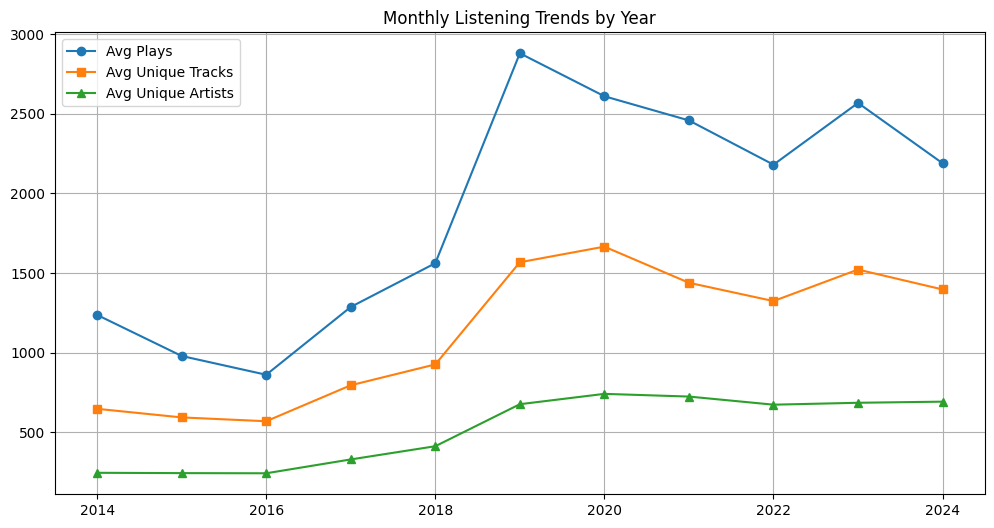

In [32]:
query = """
WITH monthly_stats AS (
    SELECT 
        year,
        month,
        COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
        COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
        COUNT(*) as total_plays
    FROM listening_history
    WHERE year > 2013 AND year < 2025
    GROUP BY year, month
)
SELECT 
    year,
    ROUND(AVG(unique_artists)) as avg_artists_per_month,
    ROUND(AVG(unique_tracks)) as avg_tracks_per_month,
    ROUND(AVG(total_plays)) as avg_plays_per_month
FROM monthly_stats
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['avg_plays_per_month'], marker='o', label='Avg Plays')
plt.plot(df['year'], df['avg_tracks_per_month'], marker='s', label='Avg Unique Tracks')
plt.plot(df['year'], df['avg_artists_per_month'], marker='^', label='Avg Unique Artists')
plt.title('Monthly Listening Trends by Year')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

query = """
WITH artist_metrics AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       COUNT(*) as total_plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       COUNT(DISTINCT strftime('%Y-%m', ts)) as active_months,
       MAX(ts) as last_played
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY artist
   HAVING total_plays >= 100
)
SELECT 
   artist,
   total_plays,
   unique_tracks,
   active_months,
   ROUND(CAST(total_plays AS FLOAT) / active_months, 2) as plays_per_month
FROM artist_metrics
ORDER BY plays_per_month DESC
LIMIT 10;
"""

print('\nMost Consistently Played Artists')
df = pd.read_sql_query(query, conn)
df


Most Consistently Played Artists


,artist,total_plays,unique_tracks,active_months,plays_per_month
0,Title Fight,4481,52,74,60.55
1,The Beatles,3280,537,110,29.82
2,P.H.F.,2235,117,75,29.80
3,Brand New,1618,61,55,29.42
4,Alex G,3310,116,113,29.29
5,Knuckle Puck,1104,49,38,29.05
6,Deadharrie,965,73,36,26.81
7,Elliott Smith,2572,104,107,24.04
8,Ty Segall,2923,168,130,22.48
9,The Brian Jonestown Massacre,2287,160,103,22.20


In [34]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   ROUND(AVG(minutes_played), 2) as avg_minutes_per_play,
   ROUND(SUM(minutes_played), 2) as total_minutes
FROM listening_history
WHERE master_metadata_album_album_name IS NOT NULL
   AND master_metadata_album_artist_name != 'Various Artists'
GROUP BY album, artist
ORDER BY total_plays DESC
LIMIT 20;
"""

print('\nTop Albums by Total Plays')
df = pd.read_sql_query(query, conn)
df


Top Albums by Total Plays


,album,artist,total_plays,unique_tracks,avg_minutes_per_play,total_minutes
0,Shed,Title Fight,1401,12,1.70,2379.12
1,Floral Green,Title Fight,1357,11,2.16,2929.76
2,Bowl Cut,Jaded Juice Riders,954,10,1.45,1381.65
3,Melted,Ty Segall,926,11,1.20,1112.77
4,Trick,Alex G,907,19,1.00,910.88
5,We Are The Champions,JEFF The Brotherhood,901,11,1.33,1195.02
6,Living Dummy,Together Pangea,852,14,1.14,973.17
7,DSU,Alex G,819,15,0.97,793.77
8,Your Favorite Weapon,Brand New,776,17,2.07,1604.77
9,Hyperview,Title Fight,772,10,2.02,1556.69


In [35]:
query = """
SELECT 
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   ROUND(AVG(minutes_played), 2) as avg_minutes,
   ROUND(SUM(minutes_played), 2) as total_minutes
FROM listening_history
WHERE master_metadata_album_artist_name IS NOT NULL
   AND master_metadata_album_artist_name != 'Various Artists'
GROUP BY artist
HAVING total_plays >= 50
ORDER BY avg_minutes DESC
LIMIT 15;
"""

print('\nArists with Highest Average Minutes per Stream')
df = pd.read_sql_query(query, conn)
df


Arists with Highest Average Minutes per Stream


,artist,total_plays,avg_minutes,total_minutes
0,UB40,63,3.96,249.30
1,Type O Negative,53,3.22,170.88
2,Digable Planets,77,3.17,244.44
3,Allman Brothers Band,61,3.15,191.89
4,Alice In Chains,226,3.15,712.12
5,Phantogram,63,2.92,184.21
6,Sigur Rós,133,2.80,372.01
7,The Beta Band,67,2.75,184.10
8,Hum,96,2.73,261.61
9,Grateful Dead,236,2.72,641.84


In [36]:
query = """
WITH track_lengths AS (
    SELECT 
        master_metadata_track_name,
        MAX(minutes_played) as track_length
    FROM listening_history
    GROUP BY master_metadata_track_name
)
SELECT 
    h.master_metadata_album_artist_name as artist,
    COUNT(*) as total_plays,
    ROUND(AVG(h.minutes_played), 2) as avg_minutes_played,
    ROUND(AVG(h.minutes_played / t.track_length * 100), 2) as completion_percentage
FROM listening_history h
JOIN track_lengths t ON h.master_metadata_track_name = t.master_metadata_track_name
WHERE h.master_metadata_album_artist_name IS NOT NULL
    AND h.master_metadata_album_artist_name != 'Various Artists'
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays >= 50
ORDER BY completion_percentage DESC
LIMIT 15;
"""

print('\nArtists with the Highest Song Completion Rates')
df = pd.read_sql_query(query, conn)
df


Artists with the Highest Song Completion Rates


,artist,total_plays,avg_minutes_played,completion_percentage
0,UB40,63,3.96,93.72
1,Ovens,58,1.08,81.46
2,Such Gold,65,1.61,78.10
3,Chokehold,116,2.32,75.78
4,Van Halen,77,2.30,75.55
5,Saves The Day,917,1.97,74.81
6,Digable Planets,77,3.17,74.47
7,Glitterer,344,1.29,74.20
8,João Gilberto,55,1.83,73.98
9,Relient K,143,2.03,73.86


In [37]:
query = """
WITH track_lengths AS (
    SELECT 
        master_metadata_track_name,
        MAX(minutes_played) as track_length
    FROM listening_history
    GROUP BY master_metadata_track_name
)
SELECT 
    h.master_metadata_album_artist_name as artist,
    COUNT(*) as total_plays,
    ROUND(AVG(h.minutes_played), 2) as avg_minutes_played,
    ROUND(AVG(h.minutes_played / t.track_length * 100), 2) as completion_percentage
FROM listening_history h
JOIN track_lengths t ON h.master_metadata_track_name = t.master_metadata_track_name
WHERE h.master_metadata_album_artist_name IS NOT NULL
    AND h.master_metadata_album_artist_name != 'Various Artists'
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays >= 150
ORDER BY completion_percentage ASC
LIMIT 15;
"""

print('\nArtists with the Lowest Song Completion Rates')
df = pd.read_sql_query(query, conn)
df


Artists with the Lowest Song Completion Rates


,artist,total_plays,avg_minutes_played,completion_percentage
0,salvia palth,159,0.55,21.02
1,Boys Age,298,0.80,23.58
2,Pill Friends,231,0.89,24.19
3,Starry Cat,195,0.64,24.51
4,Gorgeous Bully,184,0.81,24.52
5,Os Mutantes,221,0.96,25.91
6,Joy Again,211,0.71,26.15
7,Night Beats,174,0.72,26.26
8,Walter TV,153,0.73,26.69
9,Tom Zé,506,0.80,27.01


In [38]:
query = """
WITH daily_artist_plays AS (
   SELECT 
       date(ts, '-5 hours') as play_date,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays_in_day,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != '8 Bit Universe'
   GROUP BY play_date, artist
   ORDER BY plays_in_day DESC
)
SELECT 
   artist,
   play_date,
   plays_in_day,
   unique_tracks
FROM daily_artist_plays
ORDER BY plays_in_day DESC
LIMIT 15;
"""
print('\nTop Played Arists in a Single Day')
df = pd.read_sql_query(query, conn)
df


Top Played Arists in a Single Day


,artist,play_date,plays_in_day,unique_tracks
0,The Beatles,2017-03-12,121,79
1,The Beatles,2024-08-16,121,111
2,Elliott Smith,2019-10-07,109,80
3,Metallica,2019-03-19,92,34
4,The Brian Jonestown Massacre,2017-06-05,90,62
5,P.H.F.,2018-09-27,76,40
6,Black Lips,2014-05-05,75,51
7,Fontaines D.C.,2024-12-31,74,1
8,Black Lips,2014-05-07,73,53
9,Dead Ghosts,2019-11-12,73,40


In [39]:
query = """
WITH weekly_artist_plays AS (
   SELECT 
       strftime('%Y-%W', date(ts, '-5 hours')) as week,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays_in_week,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != '8 Bit Universe'
   GROUP BY week, artist
   ORDER BY plays_in_week DESC
)
SELECT 
   artist,
   week,
   plays_in_week,
   unique_tracks
FROM weekly_artist_plays
ORDER BY plays_in_week DESC
LIMIT 15;
"""
print('\nTop Played Aritsts in a Single Week')
df = pd.read_sql_query(query, conn)
df


Top Played Aritsts in a Single Week


,artist,week,plays_in_week,unique_tracks
0,Black Lips,2014-18,241,82
1,Elliott Smith,2019-40,194,82
2,The Beatles,2024-50,168,148
3,P.H.F.,2018-39,145,47
4,The Beatles,2024-33,142,120
5,The Brian Jonestown Massacre,2017-23,138,67
6,The Beatles,2017-10,122,80
7,The Brian Jonestown Massacre,2017-17,121,50
8,Dead Ghosts,2019-45,118,40
9,Metallica,2019-11,117,36


In [40]:
query = """
WITH weekly_album_plays AS (
   SELECT 
       strftime('%Y-%W', date(ts, '-5 hours')) as week,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays_in_week,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       ROUND(SUM(minutes_played), 2) as total_minutes
   FROM listening_history
   WHERE master_metadata_album_album_name IS NOT NULL
       AND master_metadata_album_artist_name != '8 Bit Universe'
   GROUP BY week, album, artist
   HAVING unique_tracks > 4
)
SELECT 
   album,
   artist,
   week,
   plays_in_week,
   unique_tracks,
   total_minutes
FROM weekly_album_plays
ORDER BY plays_in_week DESC
LIMIT 15;
"""

print('\nTop Played Albums in a Single Week')
df = pd.read_sql_query(query, conn)
df


Top Played Albums in a Single Week


,album,artist,week,plays_in_week,unique_tracks,total_minutes
0,Arabia Mountain,Black Lips,2014-18,95,16,156.16
1,Everything Under The Sun,Sublime,2014-41,88,46,128.34
2,Shapeshifter,Knuckle Puck,2023-40,67,10,187.81
3,Youth,Citizen,2023-04,65,10,169.99
4,Mellon Collie And The Infinite Sadness,The Smashing Pumpkins,2023-33,65,22,203.21
5,Underneath the Rainbow,Black Lips,2014-18,59,13,112.65
6,Everything Under The Sun,Sublime,2014-43,59,36,136.89
7,Hey Grandma and the Greatest Hits,No Parents,2016-20,57,32,31.62
8,"No Pads, No Helmets...Just Balls",Simple Plan,2024-01,55,16,142.40
9,Living Dummy,Together Pangea,2014-44,53,14,81.94


In [41]:
query = """
WITH play_counts AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       COUNT(*) as total_plays,
       MAX(ts) as last_played,
       JULIANDAY('2025-01-24') - JULIANDAY(MAX(ts)) as days_since_last_play
   FROM listening_history
   GROUP BY track, artist
   HAVING total_plays >= 125
)
SELECT 
   track,
   artist,
   total_plays,
   last_played,
   ROUND(days_since_last_play) as days_since_last_play
FROM play_counts
ORDER BY days_since_last_play DESC
LIMIT 15;
"""

print("\nSongs I like, but haven't listened to in a while")
df = pd.read_sql_query(query, conn)
df


Songs I like, but haven't listened to in a while


,track,artist,total_plays,last_played,days_since_last_play
0,Flowers On The Wall,Tomorrows Tulips,135,2020-06-18 23:22:16+00:00,1680.0
1,New Flesh,Current Joys,133,2023-09-17 20:01:16+00:00,494.0
2,Blondie,Current Joys,163,2024-04-28 16:48:03+00:00,270.0
3,Around,Jaded Juice Riders,154,2024-07-07 13:12:51+00:00,200.0
4,All Skaters Go to Heaven,IAN SWEET,153,2024-07-13 20:33:53+00:00,194.0
5,Blind Owl Speaks,Natural Child,142,2024-07-13 22:26:58+00:00,194.0
6,Forever Dumb,Surf Curse,172,2024-07-15 21:56:02+00:00,192.0
7,Freaks,Surf Curse,213,2024-07-16 02:56:15+00:00,192.0
8,Making Breakfast,Twin Peaks,127,2024-07-18 22:52:32+00:00,189.0
9,Boardwalk,Tijuana Panthers,130,2024-07-26 00:50:15+00:00,182.0


In [42]:
query = """
WITH tracks_over_100 AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays
   FROM listening_history
   WHERE master_metadata_album_artist_name != 'Easy Star All-Stars'
   GROUP BY track, artist
   HAVING plays >= 50
)
SELECT 
   t1.track,
   t1.artist as artist1,
   t2.artist as artist2,
   t1.plays as plays1,
   t2.plays as plays2
FROM tracks_over_100 t1
JOIN tracks_over_100 t2 
   ON t1.track = t2.track 
   AND t1.artist < t2.artist
ORDER BY t1.plays + t2.plays DESC;
"""

print('\nMost Played Songs with Similar Names')
df = pd.read_sql_query(query, conn)
df


Most Played Songs with Similar Names


,track,artist1,artist2,plays1,plays2
0,Birthday,Beach Fossils,Tennis Club,175,107
1,Kids,Current Joys,The Frights,143,77
2,Gone,Knuckle Puck,Mikal Cronin,111,94
3,Blood,Arc Flash,Sweet Pill,73,129
4,Drown,Microwave,The Smashing Pumpkins,121,72
5,Baby,Ariel Pink,Tomorrows Tulips,95,93
6,Chlorine,The Districts,Title Fight,58,127
7,Dazed,Bleached,Goth Babe,67,117
8,Cut Your Bangs,Girlpool,Radiator Hospital,53,101
9,Bug,Alex G,Fontaines D.C.,68,79


In [59]:
query = """
WITH yearly_albums AS (
   SELECT 
       year,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       ROUND(SUM(minutes_played), 2) as total_minutes,
       ROW_NUMBER() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) as rank
   FROM listening_history
   WHERE year > 2013 AND year < 2025
       AND master_metadata_album_album_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY year, album, artist
   HAVING unique_tracks > 4
)
SELECT 
   year,
   album,
   artist,
   plays,
   unique_tracks,
   total_minutes
FROM yearly_albums
WHERE rank = 1
ORDER BY year;
"""

print('\nTop Album for each Year')
df = pd.read_sql_query(query, conn)
df


Top Album for each Year


,year,album,artist,plays,unique_tracks,total_minutes
0,2014,Everything Under The Sun,Sublime,245,59,428.17
1,2015,We Are The Champions,JEFF The Brotherhood,164,11,245.87
2,2016,DSU,Alex G,209,15,249.14
3,2017,Take It From The Man,The Brian Jonestown Massacre,226,18,340.16
4,2018,Carbon Copy,Arc Flash,157,12,247.74
5,2019,Bowl Cut,Jaded Juice Riders,384,10,522.43
6,2020,Bowl Cut,Jaded Juice Riders,265,10,433.05
7,2021,Floral Green,Title Fight,609,11,1337.64
8,2022,Shed,Title Fight,343,12,590.28
9,2023,Shed,Title Fight,352,12,615.13


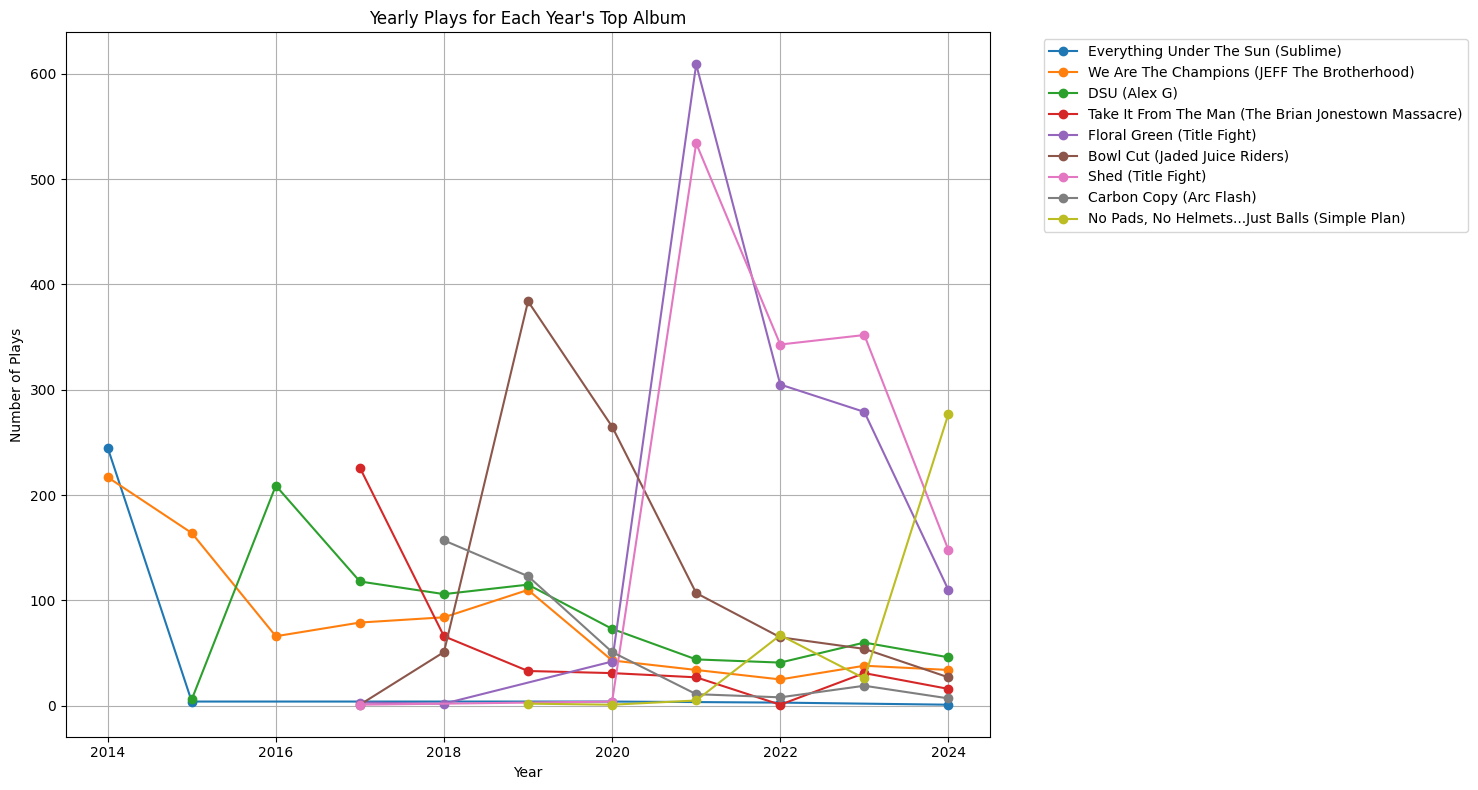

In [44]:
query = """
WITH top_albums AS (
   SELECT DISTINCT album, artist
   FROM (
       SELECT 
           year,
           master_metadata_album_album_name as album,
           master_metadata_album_artist_name as artist,
           COUNT(*) as plays,
           ROW_NUMBER() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) as rank
       FROM listening_history
       WHERE year > 2013 AND year < 2025
           AND master_metadata_album_album_name IS NOT NULL
           AND master_metadata_album_artist_name != 'Various Artists'
       GROUP BY year, album, artist
       HAVING COUNT(DISTINCT master_metadata_track_name) > 4
   )
   WHERE rank = 1
),
yearly_plays AS (
   SELECT 
       year,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays
   FROM listening_history
   WHERE (master_metadata_album_album_name, master_metadata_album_artist_name) IN (
       SELECT album, artist FROM top_albums
   )
   AND album is not "1"
   AND album is not "Good News For People Who Love Bad News"
   AND album is not "1000 gecs"
   AND year > 2013 AND year < 2025
   GROUP BY year, album, artist
)
SELECT * FROM yearly_plays
ORDER BY year, plays DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(15, 8))
for album in df['album'].unique():
   album_data = df[df['album'] == album]
   plt.plot(album_data['year'], album_data['plays'], marker='o', label=f"{album} ({album_data['artist'].iloc[0]})")

plt.title('Yearly Plays for Each Year\'s Top Album')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
query = """
WITH monthly_albums AS (
   SELECT 
       strftime('%Y-%m', ts) as month,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       ROW_NUMBER() OVER (PARTITION BY strftime('%Y-%m', ts) ORDER BY COUNT(*) DESC) as rank
   FROM listening_history
   WHERE master_metadata_album_album_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY month, album, artist
   HAVING unique_tracks > 4
)
SELECT 
   album,
   artist,
   COUNT(*) as times_top_album,
   MAX(plays) as highest_monthly_plays
FROM monthly_albums
WHERE rank = 1
GROUP BY album, artist
ORDER BY times_top_album DESC
LIMIT 10;
"""

print('\nAlbum of the Month Score Sheet')
df = pd.read_sql_query(query, conn)
df


Album of the Month Score Sheet


,album,artist,times_top_album,highest_monthly_plays
0,Shed,Title Fight,6,215
1,Hey Grandma and the Greatest Hits,No Parents,5,51
2,We Are The Champions,JEFF The Brotherhood,4,105
3,1,The Beatles,3,30
4,Floral Green,Title Fight,3,173
5,Melted,Ty Segall,3,127
6,Take It From The Man,The Brian Jonestown Massacre,3,89
7,"Whatever People Say I Am, That's What I'm Not",Arctic Monkeys,3,36
8,Anthology 1,The Beatles,2,46
9,Beatles For Sale,The Beatles,2,62
